In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [49]:
data.shape

(9994, 11)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [51]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [52]:
data['Category'].value_counts()

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: Category, dtype: int64

In [53]:
data['Sub Category'].value_counts()

Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: Sub Category, dtype: int64

In [54]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

In [55]:
# Drop north region as it having only one datapoint

data.drop(data[data['Region'] == 'North'].index, inplace = True )

In [56]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu


# Data visualization

In [61]:
# Sales by City
df1 = data[['City','Sales']]
df2 = df1.groupby(['City'])['Sales'].sum()
df2 = df2.to_frame()
df2 = df2.sort_values('Sales',ascending = False)
df2

,Sales
City,
Kanyakumari,706764
Vellore,675296
Bodi,667177
Tirunelveli,659812
Perambalur,659738
Salem,657093
Pudukottai,653179
Tenkasi,643652
Karur,642273


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


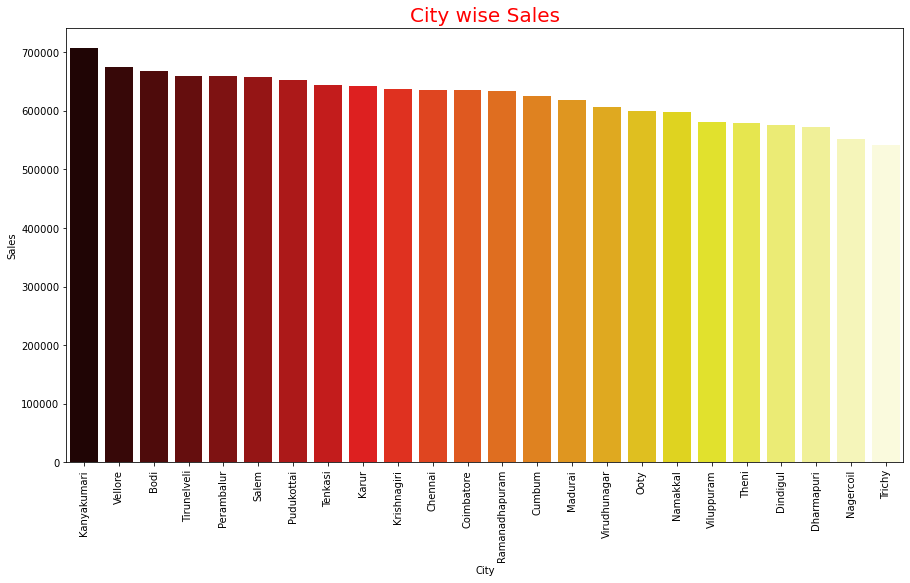

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(df2.index,df2['Sales'],palette='hot')
plt.title("City wise Sales", fontsize=20, color='r')
plt.xticks(rotation=90)
plt.show()

In [63]:
# sales by region
df3 = data[['Region','Sales']]
df4 = df3.groupby(['Region'])['Sales'].sum()
df4 = df4.to_frame()
df4 = df4.sort_values('Sales',ascending = False)
df4

,Sales
Region,
West,4798743
East,4248368
Central,3468156
South,2440461


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


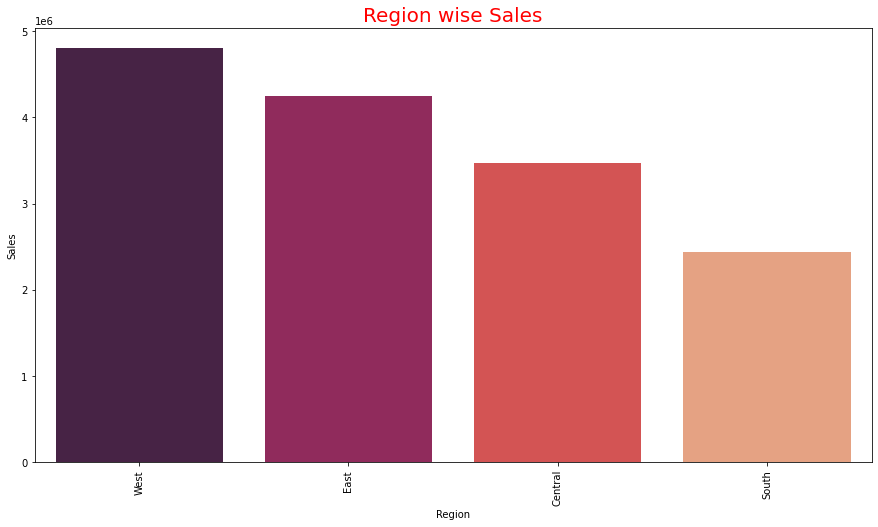

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(df4.index,df4['Sales'],palette='rocket')
plt.title("Region wise Sales", fontsize=20, color='r')
plt.xticks(rotation=90)
plt.show()

In [75]:
# sales by category

df5 = data[['Category', 'Sales']]
df6 = df5.groupby(['Category'])['Sales'].sum()
df6 = df6.to_frame()
df6 = df6.sort_values('Sales',ascending = False )
df6

,Sales
Category,
"Eggs, Meat & Fish",2267401
Snacks,2237546
Food Grains,2115272
Bakery,2112281
Fruits & Veggies,2100727
Beverages,2085313
Oil & Masala,2037188


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


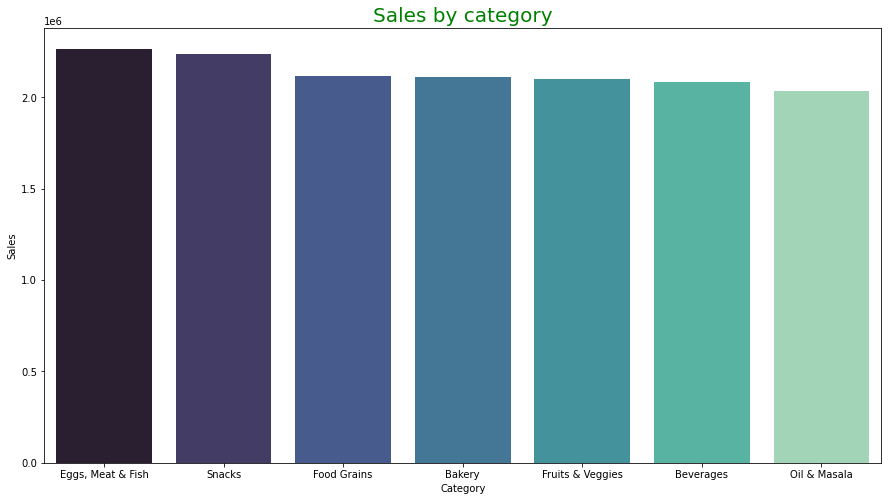

In [77]:
plt.figure(figsize = (15,8))
sns.barplot(df6.index, df6['Sales'], palette = 'mako')
plt.title("Sales by category", fontsize=20, color='g')
plt.show()

In [83]:
# profit by region

df7 = data[['Region','Profit']]
df8 = df7.groupby(['Region'])['Profit'].sum()
df8 = df8.to_frame()
df8 = df8.sort_values('Profit', ascending = False)
df8

,Profit
Region,
West,1192004.61
East,1074345.58
Central,856806.84
South,623562.89


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


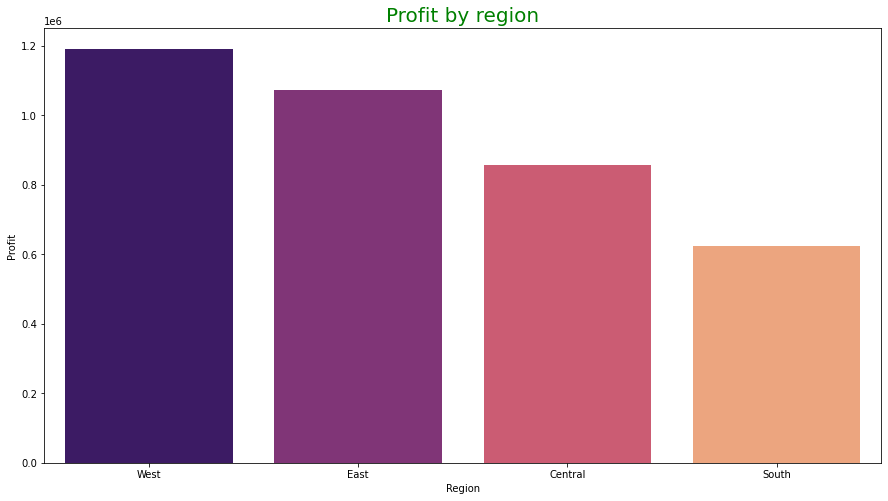

In [87]:
plt.figure(figsize = (15,8))
sns.barplot(df8.index, df8['Profit'], palette='magma')
plt.title("Profit by region", fontsize=20,color='g')
plt.show()

In [ ]:
# Extracting year from date

In [92]:
data['Year'] = pd.to_datetime(data['Order Date']).dt.year

In [93]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,2016
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu,2015


In [99]:
# sales per year

df9 = data[['Year','Sales']]
df10 = df9.groupby(['Year'])['Sales'].sum()
df10 = df10.to_frame()
df10

,Sales
Year,
2015,2975599
2016,3131959
2017,3870658
2018,4977512


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


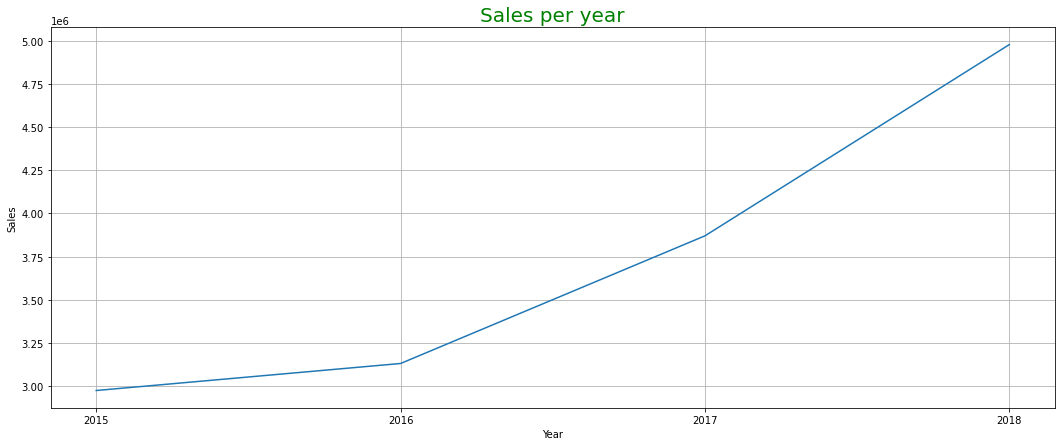

In [103]:
plt.figure(figsize=(18,7))
sns.lineplot(df10.index, df10['Sales'])
plt.xticks(ticks=[2015,2016,2017,2018])
plt.title("Sales per year", fontsize=20, color='g')
plt.grid()
plt.show()

In [104]:
# profit per year

df11 = data[['Year','Profit']]
df12 = df11.groupby(['Year'])['Profit'].sum()
df12 = df12.to_frame()
df12

,Profit
Year,
2015,752529.11
2016,797192.99
2017,952814.94
2018,1244182.88


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


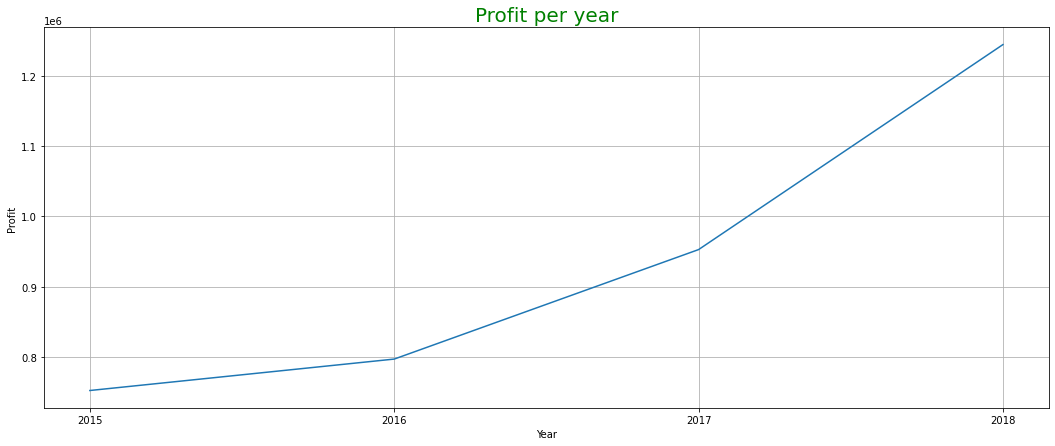

In [106]:
plt.figure(figsize=(18,7))
sns.lineplot(df12.index, df12['Profit'])
plt.xticks(ticks=[2015,2016,2017,2018])
plt.title("Profit per year", fontsize=20, color='g')
plt.grid()
plt.show()

In [112]:
# number of orders per year

df13 = data[['Year','Order ID']]
df14 = df13.groupby(['Year'])['Order ID'].count()
df14 = df14.to_frame()
df14

,Order ID
Year,
2015,1993
2016,2102
2017,2586
2018,3312


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


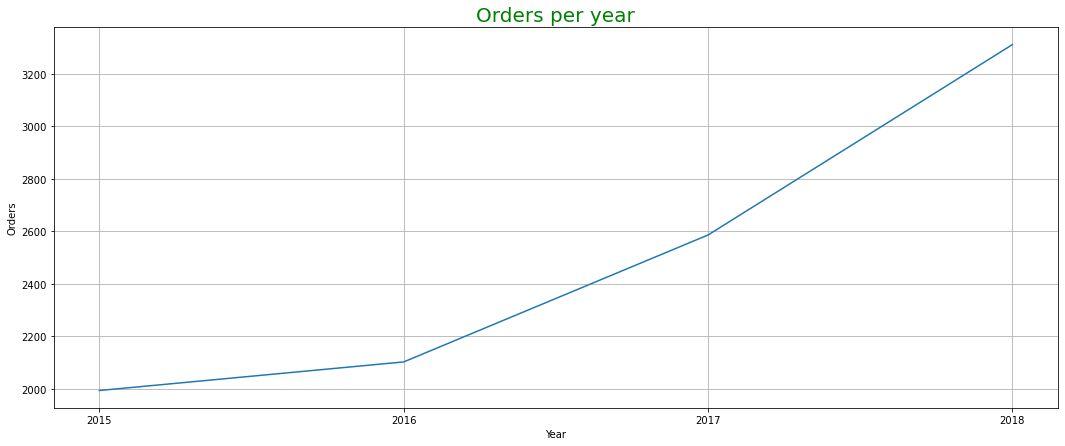

In [114]:
plt.figure(figsize=(18,7))
sns.lineplot(df14.index, df14['Order ID'])
plt.xticks(ticks=[2015,2016,2017,2018])
plt.ylabel('Orders')
plt.title("Orders per year", fontsize=20, color='g')
plt.grid()
plt.show()